# Thesis modelling

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Now read the CSV file with Pandas
columns_to_include = list(range(10))  # This creates a list of integers from 0 to 9
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

In [3]:
import pandas as pd

try:
    with open('combined_data.csv', 'r') as file:
        data = file.read().replace(',', '.')
except FileNotFoundError:
    print("The file 'combined_data.csv' does not exist.")
    data = None

if data:
    with open('combined_data.csv', 'w') as file:
        file.write(data)

    # Now read the CSV file with Pandas
    columns_to_include = list(range(10))  # This creates a list of integers from 0 to 9
    try:
        dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)
        
        missing_values_per_row = dataset.isnull().sum(axis=1)
        
        rows_with_missing_values = missing_values_per_row[missing_values_per_row > 0].count()
        
        print(f"Number of rows with missing values: {rows_with_missing_values}")
        
    except pd.errors.EmptyDataError:
        print("The CSV file is empty or cannot be read.")


Number of rows with missing values: 0


In [5]:
# Iterate through columns (excluding the first row)
for column_name in dataset.columns[:]:
    column = dataset[column_name]
        if column.apply(lambda x: pd.to_numeric(x, errors='coerce')).notna().all():
        print(f"Column '{column_name}' contains all numerical values.")
    else:
        print(f"Column '{column_name}' contains non-numerical values.")


Column 'Timestamp' contains non-numerical values.
Column 'Module Temperature' contains all numerical values.
Column 'Irradiance' contains all numerical values.
Column 'Temperature' contains all numerical values.
Column 'Humidity' contains all numerical values.
Column 'Pressure' contains all numerical values.
Column 'Wind Speed' contains all numerical values.
Column 'Wind Direction' contains all numerical values.
Column 'Rain' contains all numerical values.
Column 'PV yield counter' contains all numerical values.


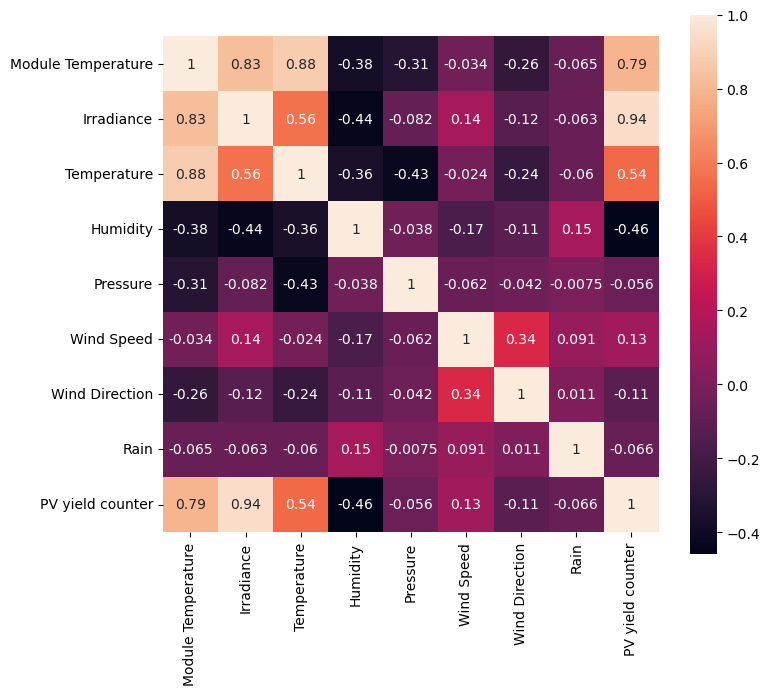

In [6]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, square=True);


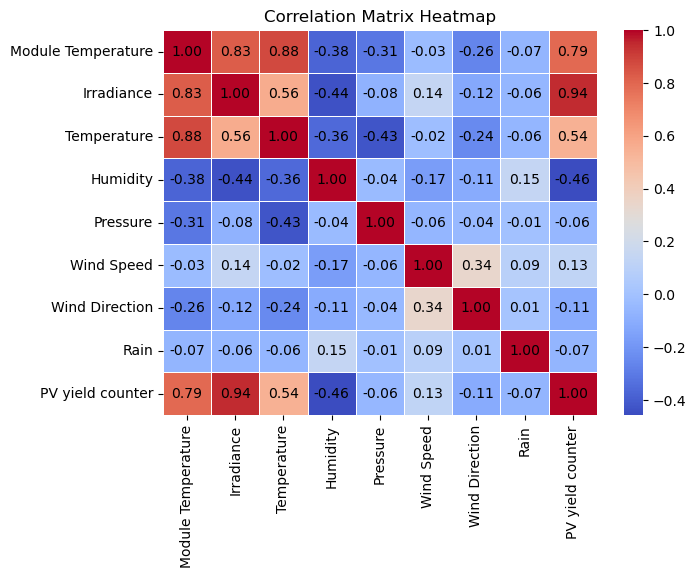

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7, 5))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"color": "black"})

# Set the plot title
plt.title("Correlation Matrix Heatmap")

# Display the plot
plt.show()


<Axes: >

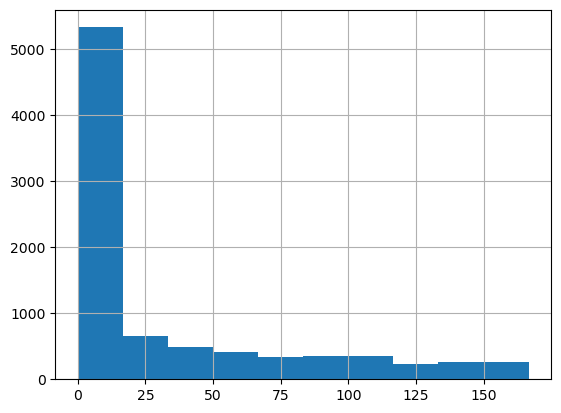

In [8]:
dataset['PV yield counter'].hist()

<Axes: >

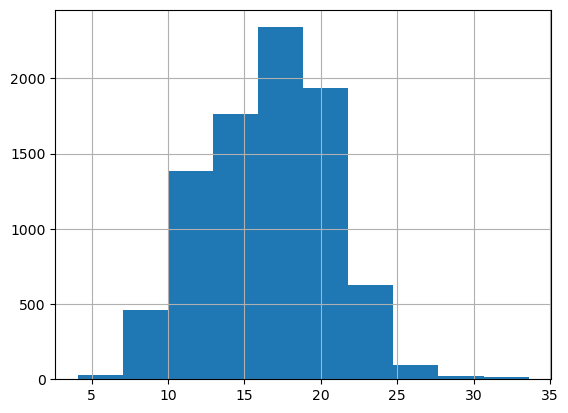

In [9]:
dataset['Temperature'].hist()

<Axes: >

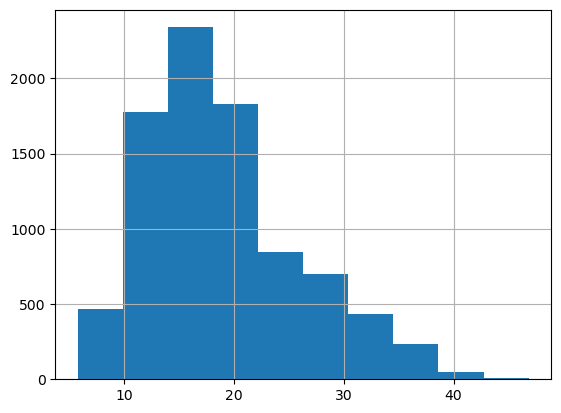

In [10]:
dataset['Module Temperature'].hist()

<Axes: >

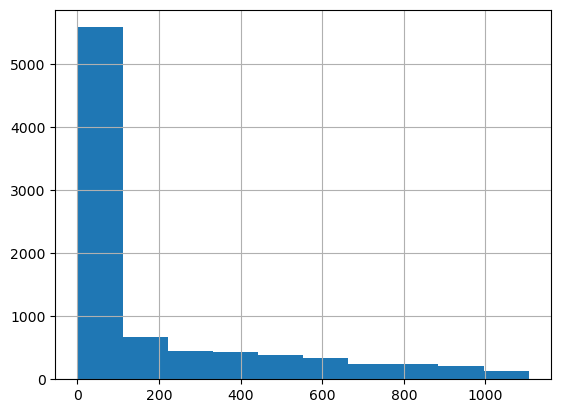

In [11]:
dataset['Irradiance'].hist()

<Axes: >

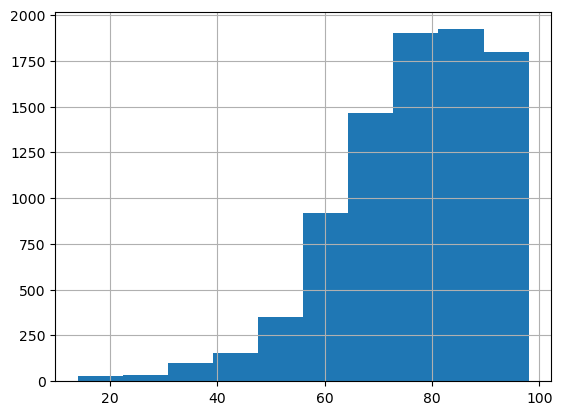

In [12]:
dataset['Humidity'].hist()

<Axes: >

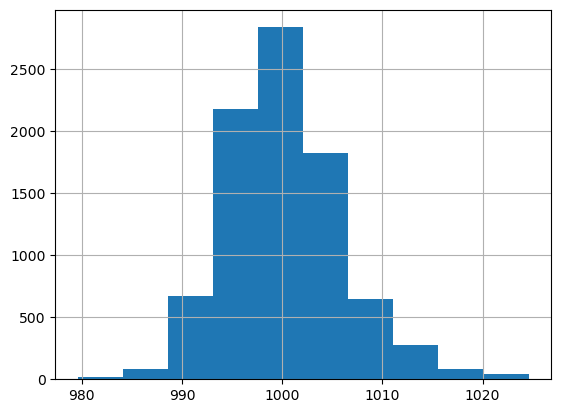

In [13]:
dataset['Pressure'].hist()

<Axes: >

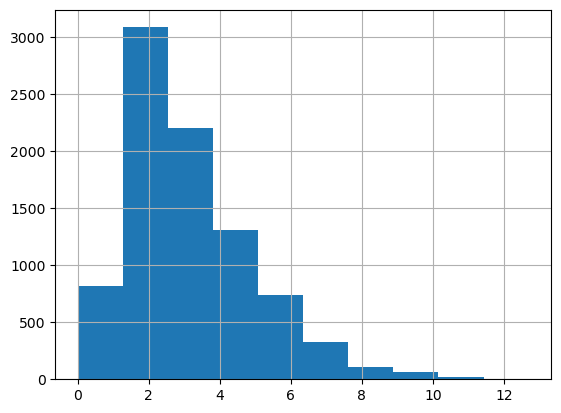

In [14]:
dataset['Wind Speed'].hist()

<Axes: >

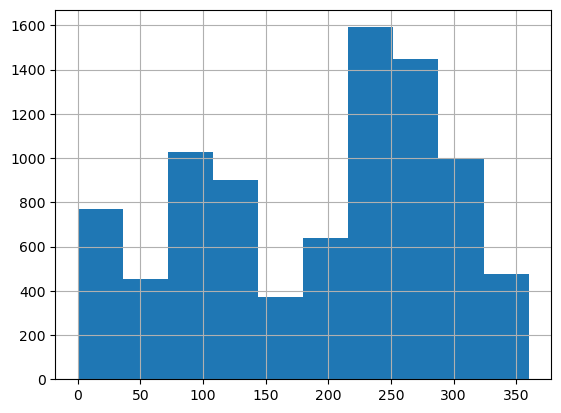

In [15]:
dataset['Wind Direction'].hist()

Hourly data now

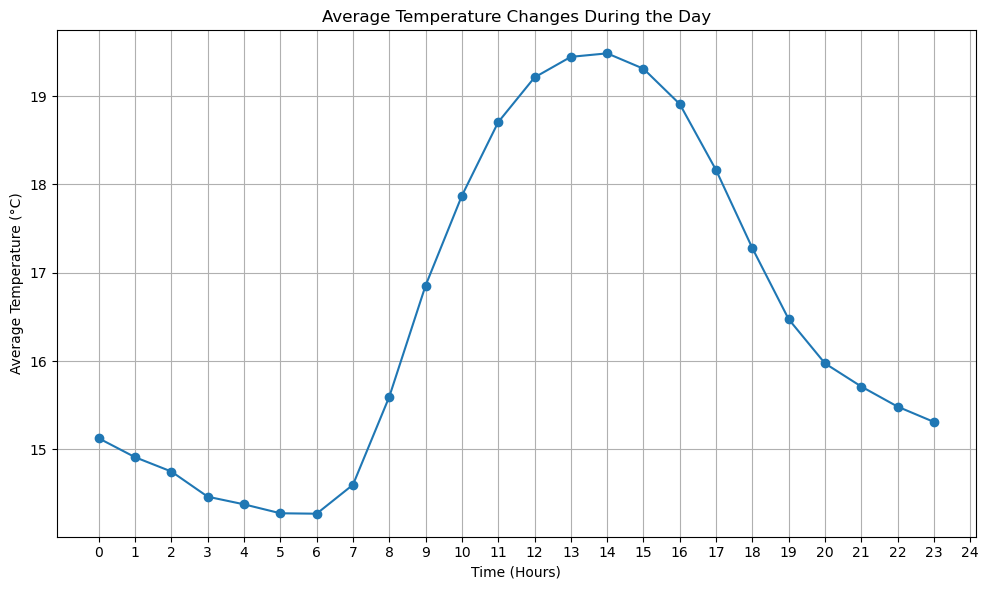

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Hour'] = dataset['Timestamp'].dt.hour

hourly_avg_temperature = dataset.groupby('Hour')['Temperature'].mean().reset_index()

plt.figure(figsize=(10, 6))  
plt.plot(hourly_avg_temperature['Hour'], hourly_avg_temperature['Temperature'], marker='o', linestyle='-')

plt.xlabel('Time (Hours)')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Changes During the Day')

plt.xticks(range(25))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


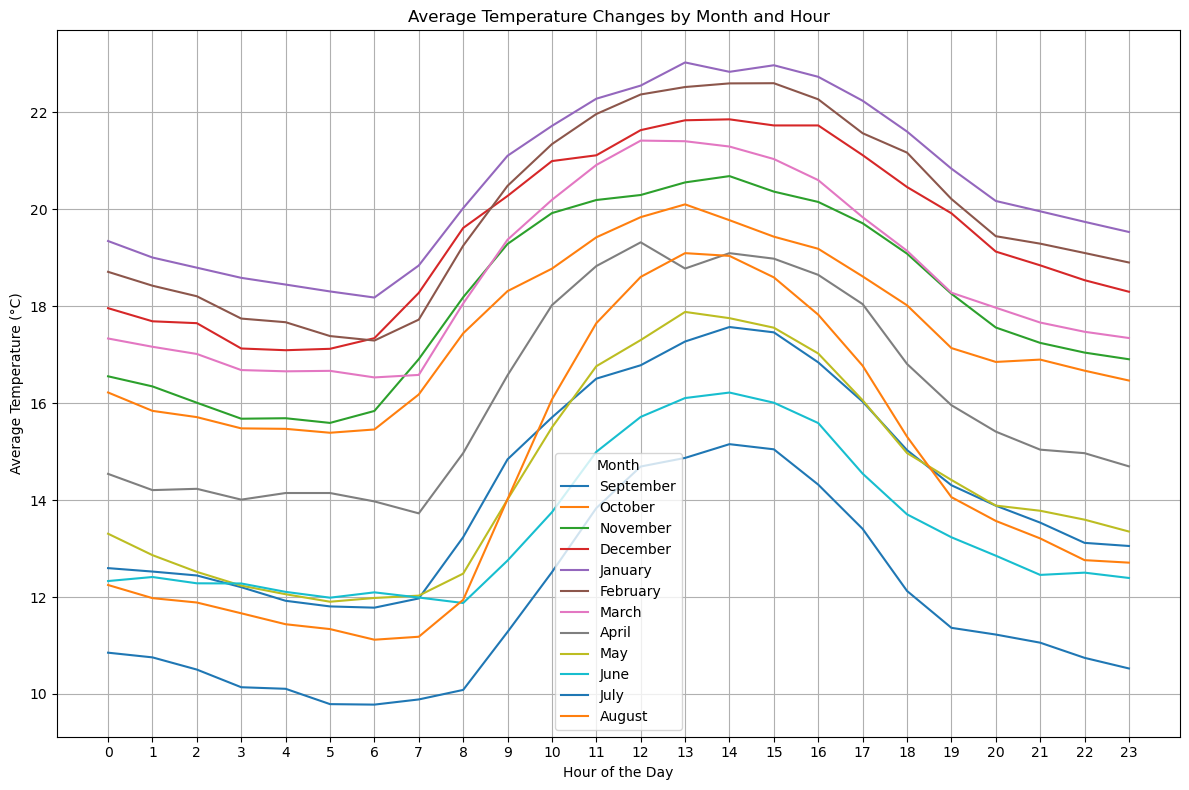

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Convert the 'Timestamp' column to datetime
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

# Extract the month and hour from the timestamp
dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Hour'] = dataset['Timestamp'].dt.hour

# Group the data by month and hour and calculate the mean Temperature for each month and hour
monthly_hourly_avg_temperature = dataset.groupby(['Month', 'Hour'])['Temperature'].mean().reset_index()

# Create 12 separate line graphs, one for each month
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through each month and create a separate line graph
for month in dataset['Month'].unique():
    month_data = monthly_hourly_avg_temperature[monthly_hourly_avg_temperature['Month'] == month]
    plt.plot(month_data['Hour'], month_data['Temperature'], label=month)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Changes by Month and Hour')

# Set x-axis ticks to show all hours from 0 to 23
plt.xticks(range(24))

# Add a legend
plt.legend(title='Month')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


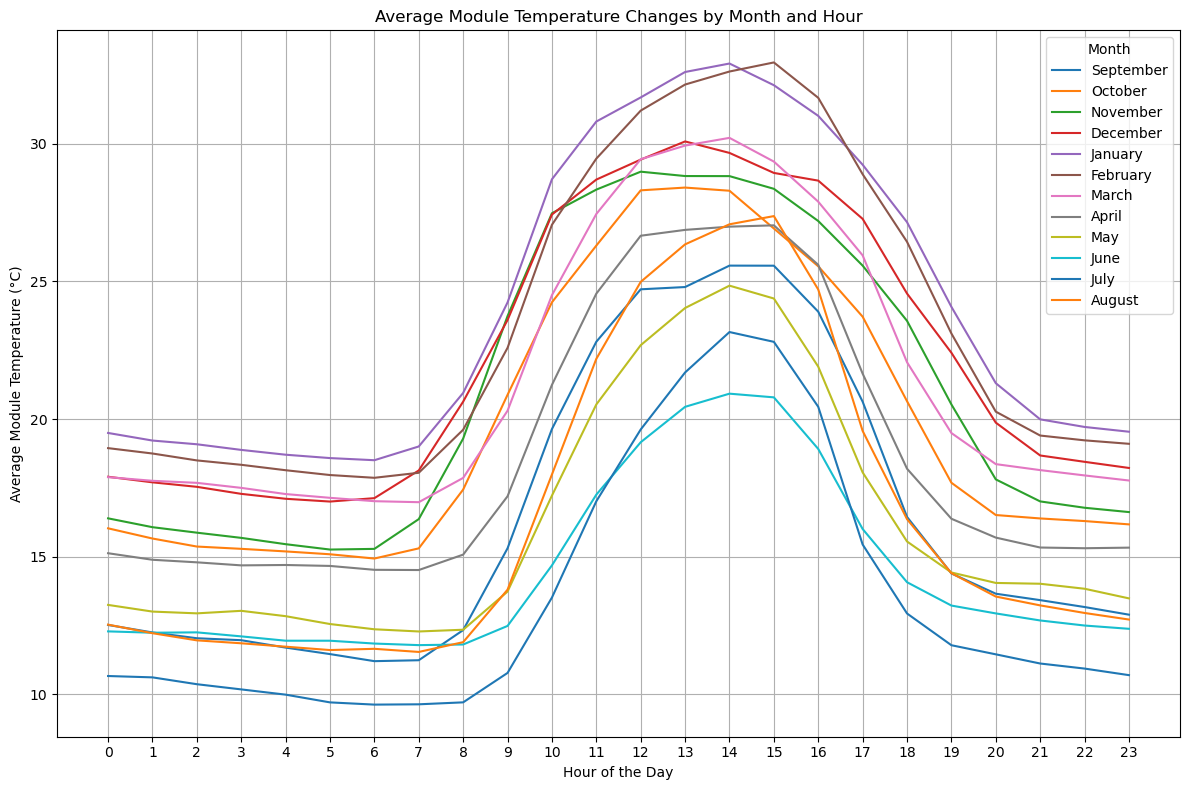

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Convert the 'Timestamp' column to datetime
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

# Extract the month and hour from the timestamp
dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Hour'] = dataset['Timestamp'].dt.hour

# Group the data by month and hour and calculate the mean Module Temperature for each month and hour
monthly_hourly_avg_module_temperature = dataset.groupby(['Month', 'Hour'])['Module Temperature'].mean().reset_index()

# Create 12 separate line graphs, one for each month
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through each month and create a separate line graph
for month in dataset['Month'].unique():
    month_data = monthly_hourly_avg_module_temperature[monthly_hourly_avg_module_temperature['Month'] == month]
    plt.plot(month_data['Hour'], month_data['Module Temperature'], label=month)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Module Temperature (°C)')
plt.title('Average Module Temperature Changes by Month and Hour')

# Set x-axis ticks to show all hours from 0 to 23
plt.xticks(range(24))

# Add a legend
plt.legend(title='Month')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


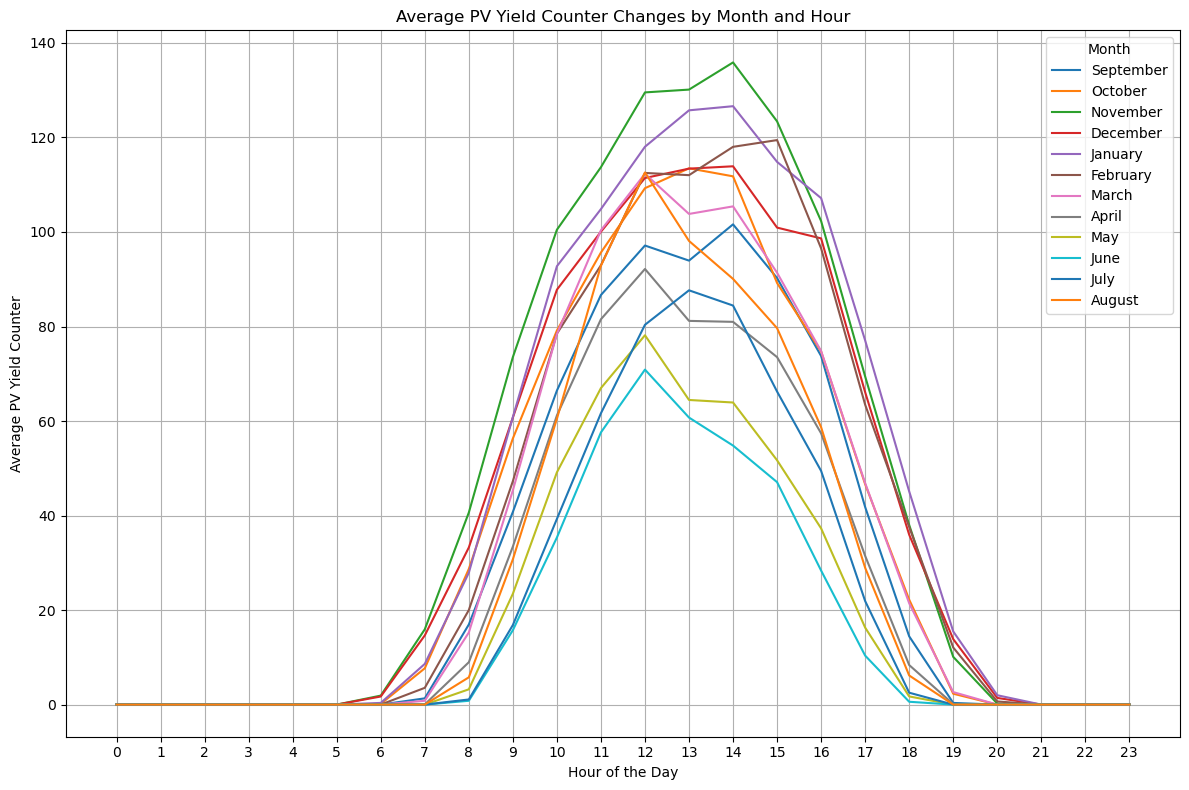

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Convert the 'Timestamp' column to datetime
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Hour'] = dataset['Timestamp'].dt.hour

monthly_hourly_avg_output = dataset.groupby(['Month', 'Hour'])['PV yield counter'].mean().reset_index()

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

for month in dataset['Month'].unique():
    month_data = monthly_hourly_avg_output[monthly_hourly_avg_output['Month'] == month]
    plt.plot(month_data['Hour'], month_data['PV yield counter'], label=month)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average PV Yield Counter')
plt.title('Average PV Yield Counter Changes by Month and Hour')

plt.xticks(range(24))

plt.legend(title='Month')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


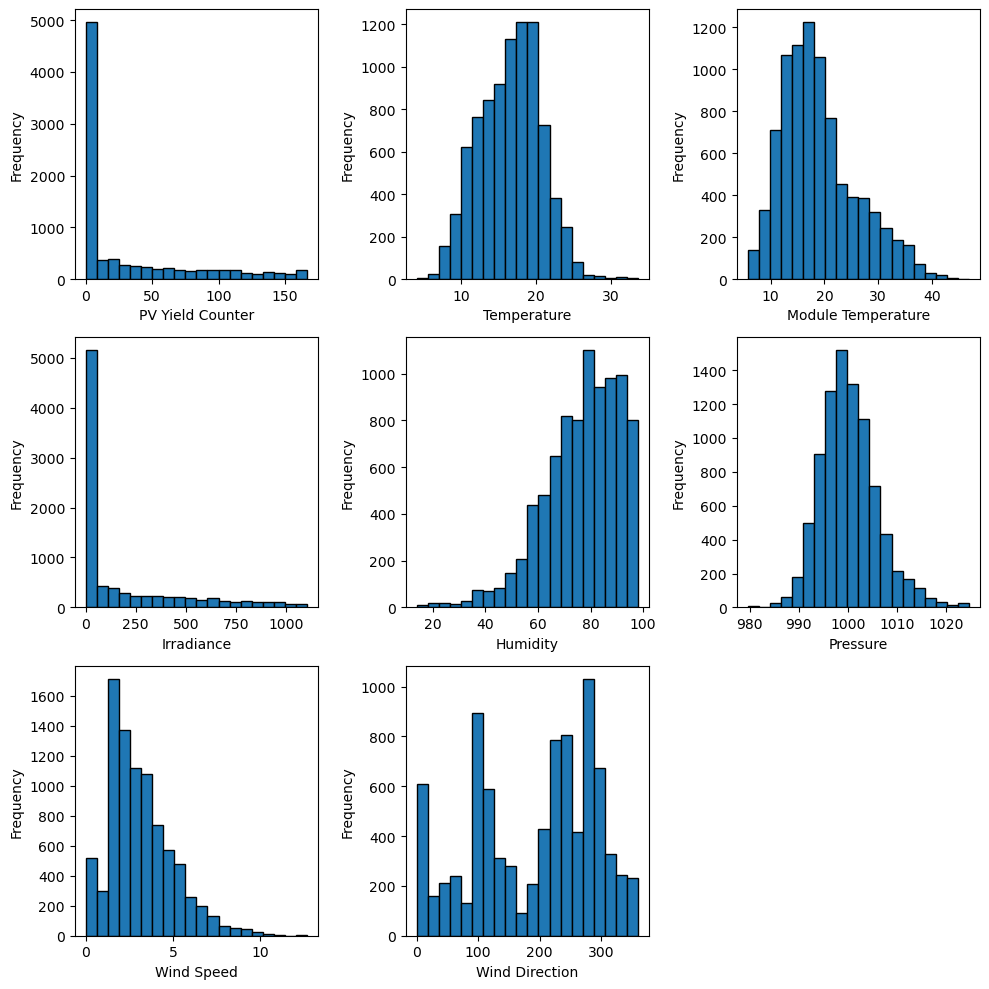

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Create subplots in a 3x3 grid
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.hist(dataset['PV yield counter'], bins=20, edgecolor='black')
plt.xlabel('PV Yield Counter')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
plt.hist(dataset['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(3, 3, 3)
plt.hist(dataset['Module Temperature'], bins=20, edgecolor='black')
plt.xlabel('Module Temperature')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
plt.hist(dataset['Irradiance'], bins=20, edgecolor='black')
plt.xlabel('Irradiance')
plt.ylabel('Frequency')

plt.subplot(3, 3, 5)
plt.hist(dataset['Humidity'], bins=20, edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
plt.hist(dataset['Pressure'], bins=20, edgecolor='black')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.subplot(3, 3, 7)
plt.hist(dataset['Wind Speed'], bins=20, edgecolor='black')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

plt.subplot(3, 3, 8)
plt.hist(dataset['Wind Direction'], bins=20, edgecolor='black')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


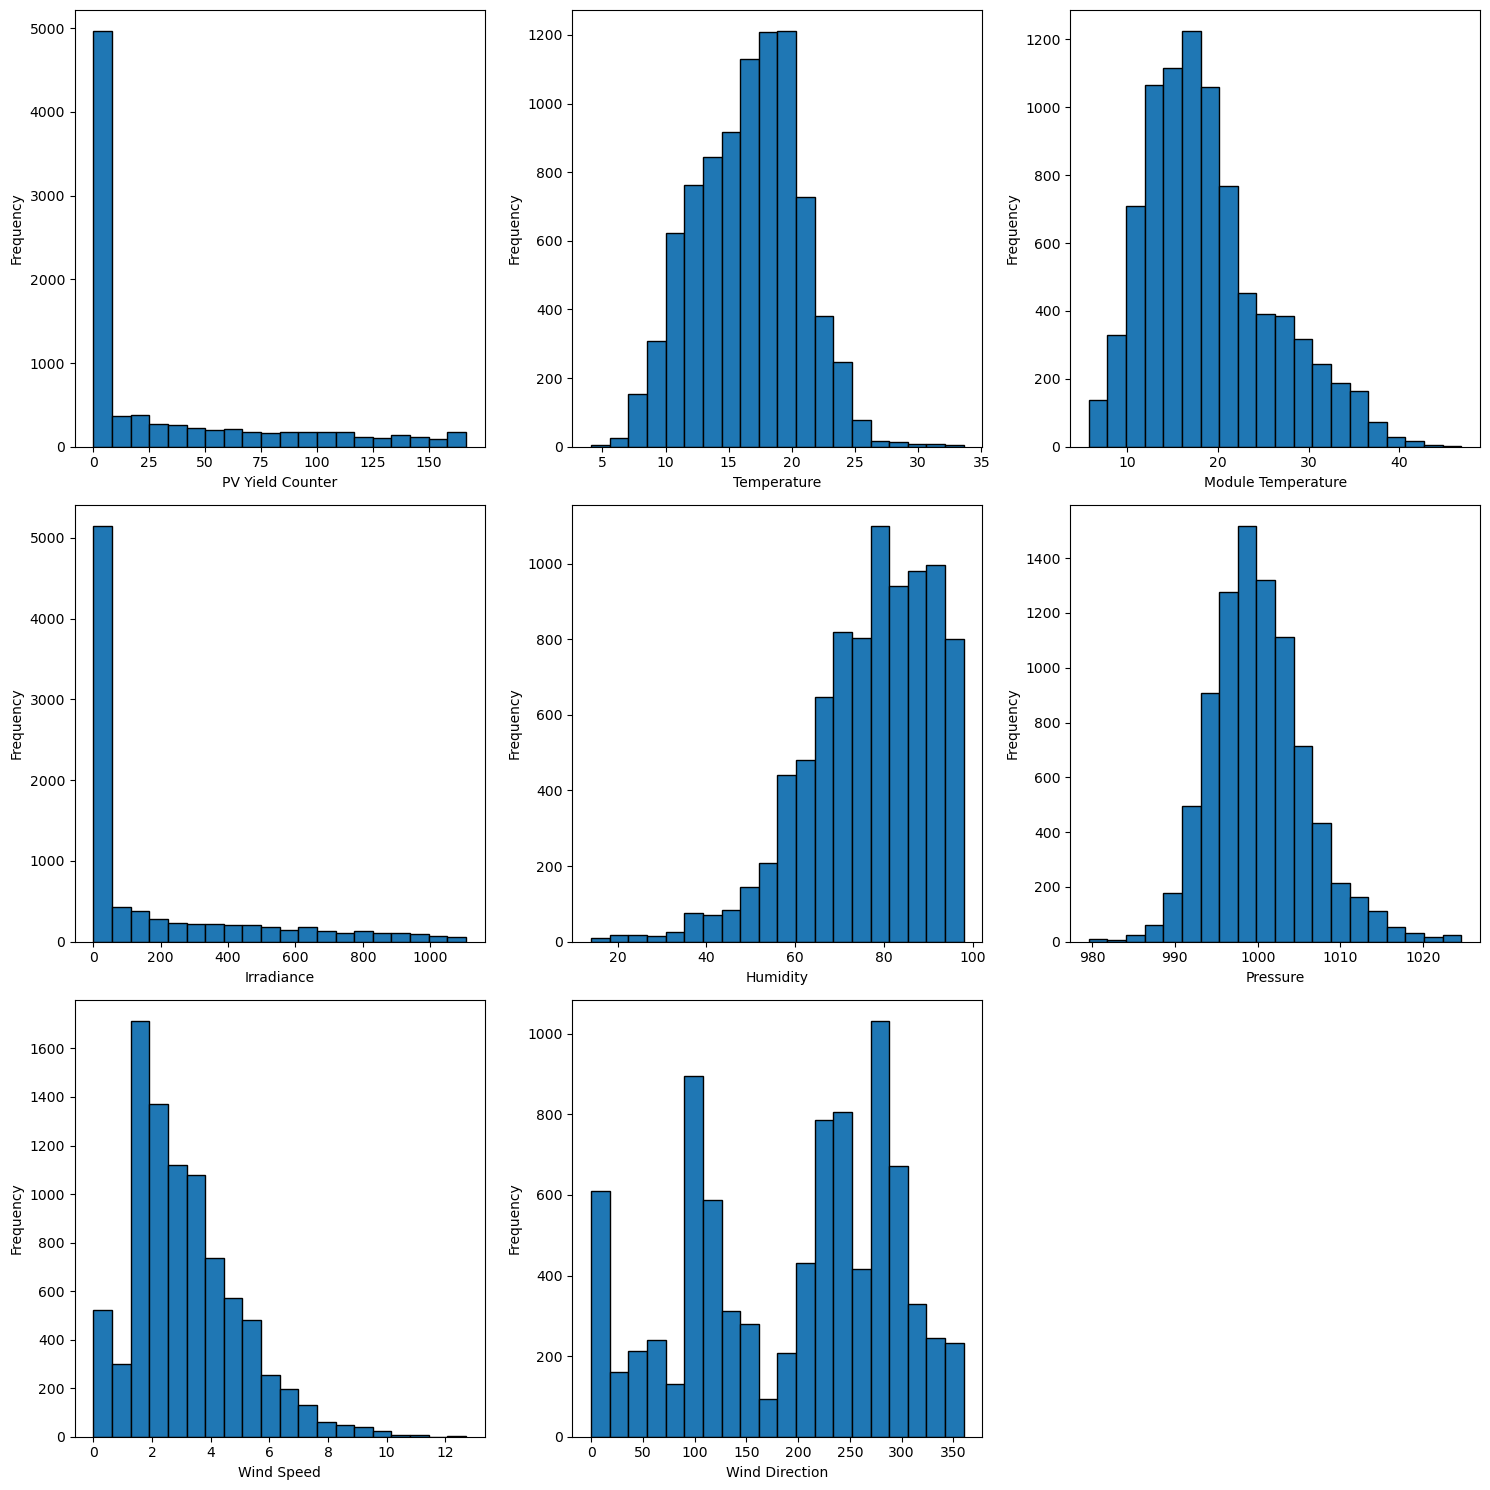

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Create subplots in a 3x3 grid
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.hist(dataset['PV yield counter'], bins=20, edgecolor='black')
plt.xlabel('PV Yield Counter')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
plt.hist(dataset['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(3, 3, 3)
plt.hist(dataset['Module Temperature'], bins=20, edgecolor='black')
plt.xlabel('Module Temperature')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
plt.hist(dataset['Irradiance'], bins=20, edgecolor='black')
plt.xlabel('Irradiance')
plt.ylabel('Frequency')

plt.subplot(3, 3, 5)
plt.hist(dataset['Humidity'], bins=20, edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
plt.hist(dataset['Pressure'], bins=20, edgecolor='black')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.subplot(3, 3, 7)
plt.hist(dataset['Wind Speed'], bins=20, edgecolor='black')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

plt.subplot(3, 3, 8)
plt.hist(dataset['Wind Direction'], bins=20, edgecolor='black')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


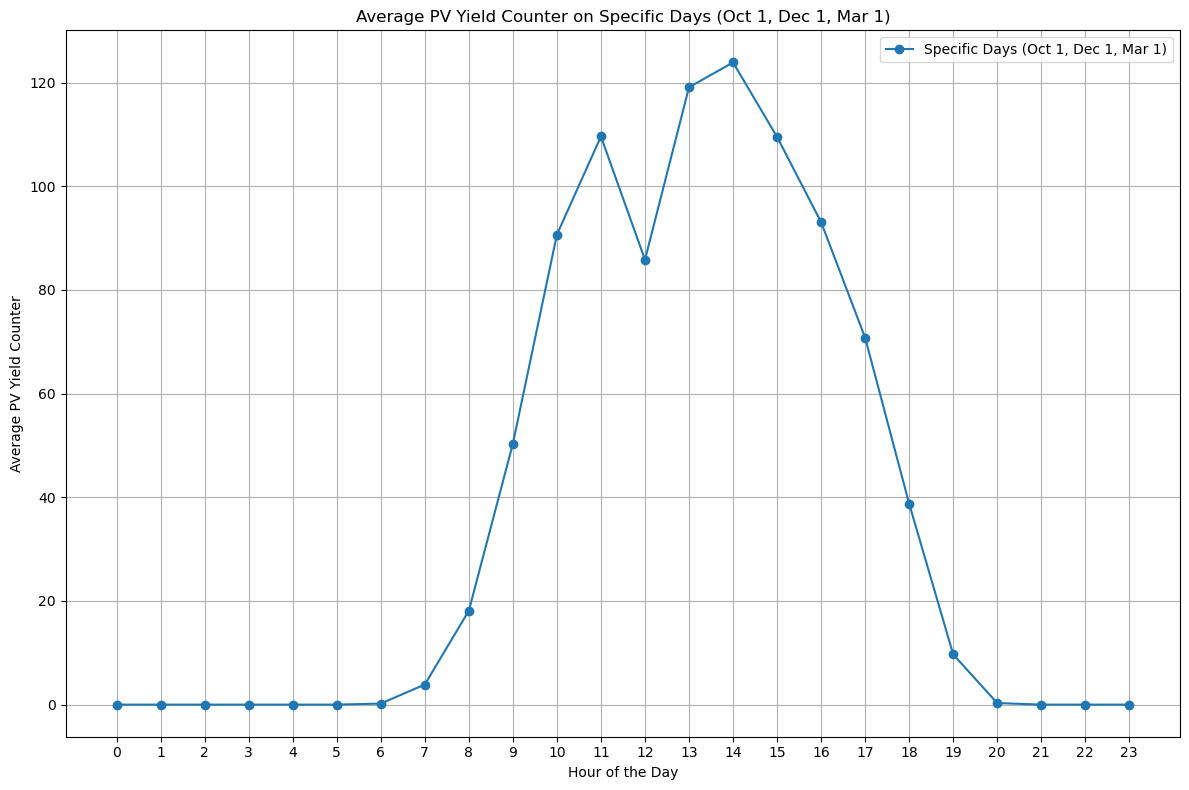

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Day'] = dataset['Timestamp'].dt.day
dataset['Hour'] = dataset['Timestamp'].dt.hour

specific_days_data = dataset[(dataset['Month'].isin(['October', 'December', 'March'])) &
                             (dataset['Day'] == 1)]

hourly_avg_output = specific_days_data.groupby('Hour')['PV yield counter'].mean()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

plt.plot(hourly_avg_output.index, hourly_avg_output.values, label='Specific Days (Oct 1, Dec 1, Mar 1)', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Average PV Yield Counter')
plt.title('Average PV Yield Counter on Specific Days (Oct 1, Dec 1, Mar 1)')

plt.xticks(range(24))
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


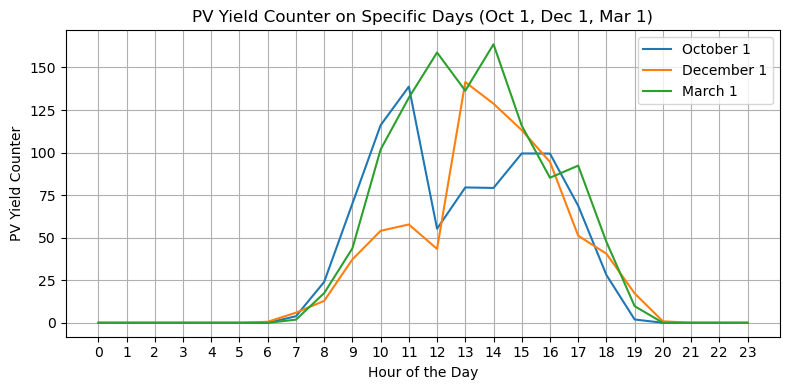

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Day'] = dataset['Timestamp'].dt.day
dataset['Hour'] = dataset['Timestamp'].dt.hour

specific_days_data = dataset[(dataset['Month'].isin(['October', 'December', 'March'])) &
                             (dataset['Day'].isin([1]))]

plt.figure(figsize=(8, 4))  # Adjust the figure size as needed

for idx, (month, day) in enumerate([('October', 1), ('December', 1), ('March', 1)]):
    specific_day_data = specific_days_data[(specific_days_data['Month'] == month) &
                                           (specific_days_data['Day'] == day)]
    plt.plot(specific_day_data['Hour'], specific_day_data['PV yield counter'], label=f'{month} {day}', )

plt.xlabel('Hour of the Day')
plt.ylabel('PV Yield Counter')
plt.title('PV Yield Counter on Specific Days (Oct 1, Dec 1, Mar 1)')

plt.xticks(range(24))

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


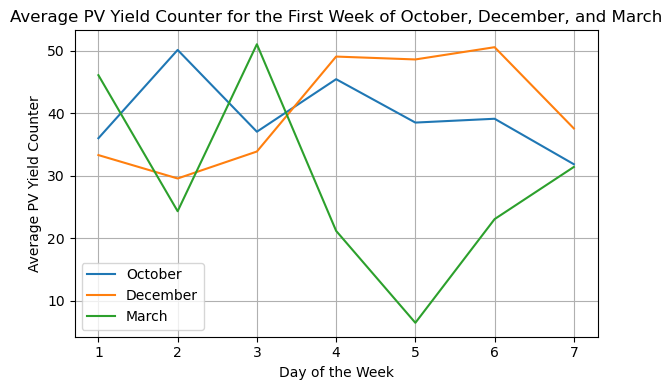

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Convert the 'Timestamp' column to datetime
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Day'] = dataset['Timestamp'].dt.day

specific_days_data = dataset[((dataset['Month'] == 'October') & (dataset['Day'].between(1, 7))) |
                             ((dataset['Month'] == 'December') & (dataset['Day'].between(1, 7))) |
                             ((dataset['Month'] == 'March') & (dataset['Day'].between(1, 7)))]

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

for month in ['October', 'December', 'March']:
    specific_month_data = specific_days_data[specific_days_data['Month'] == month]
    daily_avg_output = specific_month_data.groupby('Day')['PV yield counter'].mean()
    plt.plot(daily_avg_output.index, daily_avg_output.values, label=f'{month}')

plt.xlabel('Day of the Week')
plt.ylabel('Average PV Yield Counter')
plt.title('Average PV Yield Counter for the First Week of October, December, and March')

plt.xticks(range(1, 8))

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


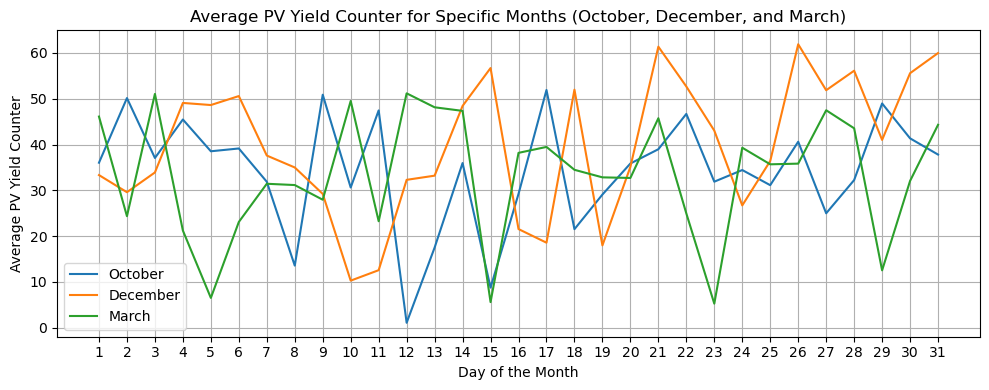

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Month'] = dataset['Timestamp'].dt.strftime('%B')  # Get the full month name
dataset['Day'] = dataset['Timestamp'].dt.day

specific_months_data = dataset[(dataset['Month'].isin(['October', 'December', 'March']))]

plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

for month in ['October', 'December', 'March']:
    specific_month_data = specific_months_data[specific_months_data['Month'] == month]
    daily_avg_output = specific_month_data.groupby('Day')['PV yield counter'].mean()
    plt.plot(daily_avg_output.index, daily_avg_output.values, label=f'{month}')

plt.xlabel('Day of the Month')
plt.ylabel('Average PV Yield Counter')
plt.title('Average PV Yield Counter for Specific Months (October, December, and March)')

plt.xticks(range(1, 32))  # You can adjust this based on the month with the most days

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


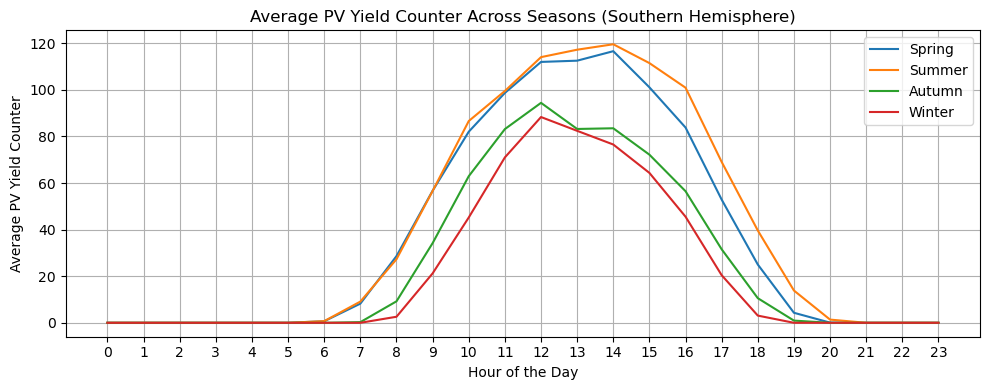

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
columns_to_include = list(range(10))
dataset = pd.read_csv('combined_data.csv', delimiter=';', usecols=columns_to_include)

# Convert the 'Timestamp' column to datetime
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Month'] = dataset['Timestamp'].dt.month
dataset['Hour'] = dataset['Timestamp'].dt.hour

spring_months = [9, 10, 11]  # September, October, November
summer_months = [12, 1, 2]   # December, January, February
fall_months = [3, 4, 5]      # March, April, May
winter_months = [6, 7, 8]     # June, July, August

spring_data = dataset[dataset['Month'].isin(spring_months)]
summer_data = dataset[dataset['Month'].isin(summer_months)]
fall_data = dataset[dataset['Month'].isin(fall_months)]
winter_data = dataset[dataset['Month'].isin(winter_months)]

spring_hourly_avg = spring_data.groupby('Hour')['PV yield counter'].mean()
summer_hourly_avg = summer_data.groupby('Hour')['PV yield counter'].mean()
fall_hourly_avg = fall_data.groupby('Hour')['PV yield counter'].mean()
winter_hourly_avg = winter_data.groupby('Hour')['PV yield counter'].mean()

plt.figure(figsize=(10, 4))

plt.plot(spring_hourly_avg.index, spring_hourly_avg.values, label='Spring', )
plt.plot(summer_hourly_avg.index, summer_hourly_avg.values, label='Summer', )
plt.plot(fall_hourly_avg.index, fall_hourly_avg.values, label='Autumn', )
plt.plot(winter_hourly_avg.index, winter_hourly_avg.values, label='Winter', )

plt.xlabel('Hour of the Day')
plt.ylabel('Average PV Yield Counter')
plt.title('Average PV Yield Counter Across Seasons (Southern Hemisphere)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


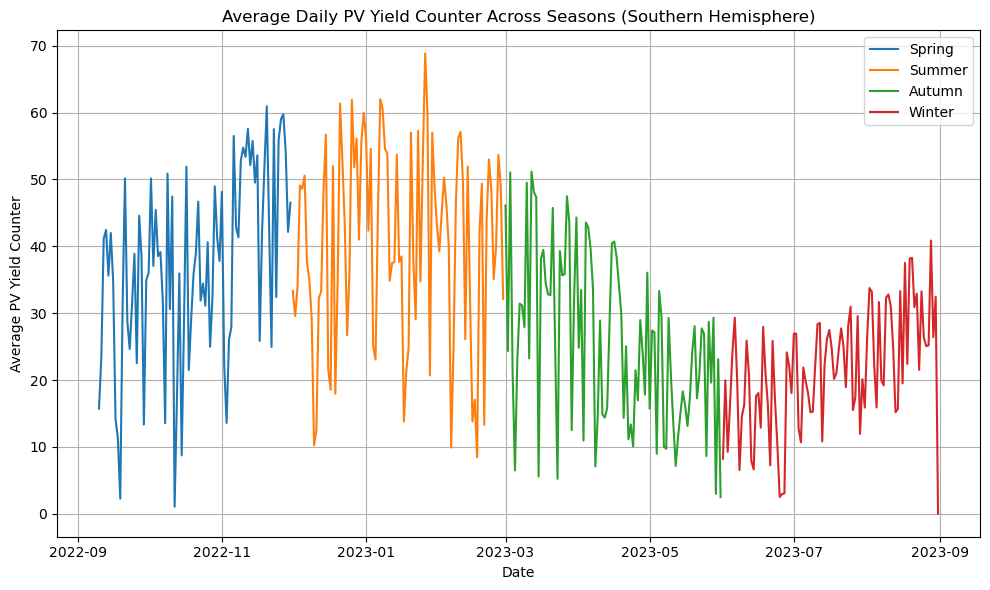

In [31]:

dataset = dataset[dataset['Timestamp'] <= '2023-08-31']

spring_data = dataset[dataset['Month'].isin(spring_months)]
summer_data = dataset[dataset['Month'].isin(summer_months)]
fall_data = dataset[dataset['Month'].isin(fall_months)]
winter_data = dataset[dataset['Month'].isin(winter_months)]
# Calculate the average PV yield counter for each day within the season
spring_daily_avg = spring_data.groupby(spring_data['Timestamp'].dt.date)['PV yield counter'].mean()
summer_daily_avg = summer_data.groupby(summer_data['Timestamp'].dt.date)['PV yield counter'].mean()
fall_daily_avg = fall_data.groupby(fall_data['Timestamp'].dt.date)['PV yield counter'].mean()
winter_daily_avg = winter_data.groupby(winter_data['Timestamp'].dt.date)['PV yield counter'].mean()

plt.figure(figsize=(10, 6))

plt.plot(spring_daily_avg.index, spring_daily_avg.values, label='Spring')
plt.plot(summer_daily_avg.index, summer_daily_avg.values, label='Summer')
plt.plot(fall_daily_avg.index, fall_daily_avg.values, label='Autumn')
plt.plot(winter_daily_avg.index, winter_daily_avg.values, label='Winter')

plt.xlabel('Date')
plt.ylabel('Average PV Yield Counter')
plt.title('Average Daily PV Yield Counter Across Seasons (Southern Hemisphere)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
